# LOGISTIC REGRESSION

## 1. Data Exploration:

### a. Load the dataset and perform exploratory data analysis (EDA).

In [33]:
#import pandas library
import pandas as pd
import numpy as np

In [34]:
#Read training csv file
df_train=pd.read_csv("titanic_train.csv")
display("Training Data:\n",df_train.head())

#Read testing csv file
df_test=pd.read_csv("titanic_test.csv")
display("Testing Data:\n",df_test.head())

'Training Data:\n'

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


'Testing Data:\n'

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [35]:
# Get info about titanic_train dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [36]:
#get the shape of the training dataset
display(df_train.shape)

#get the shape of the testing dataset
display(df_test.shape)

(891, 12)

(418, 11)

In [37]:
#Check for Duplicate rows
df_train.duplicated().sum()

np.int64(0)

### b. Examine the features, their types, and summary statistics.

In [38]:
#Check the datatypes
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [39]:
#Describe the statistical summary for numerical columns
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [40]:
#Describe thestatistical summary categorical columns
df_train.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dooley, Mr. Patrick",male,347082,G6,S
freq,1,577,7,4,644


In [41]:
#Seperate categorical and numerical columns
cat_cols=df_train.select_dtypes(include='object')
num_cols=df_train.select_dtypes(include='number')
print("Categorical columns:",cat_cols.columns)
print("Numerical columns:",num_cols.columns)

Categorical columns: Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')
Numerical columns: Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')


### c. Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features.

In [42]:
#import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

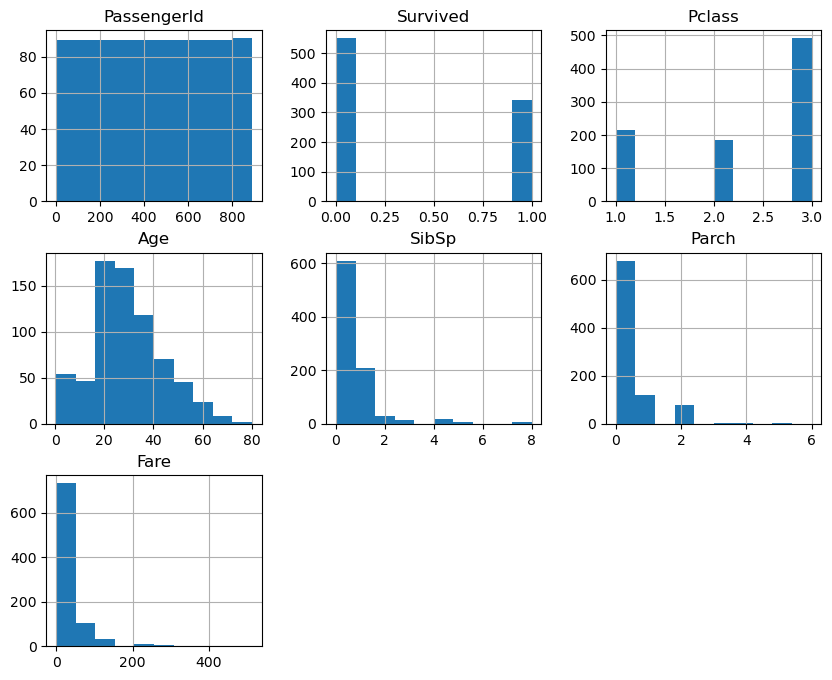

In [43]:
#Histogram
df_train.hist(figsize=(10,8))
plt.show()

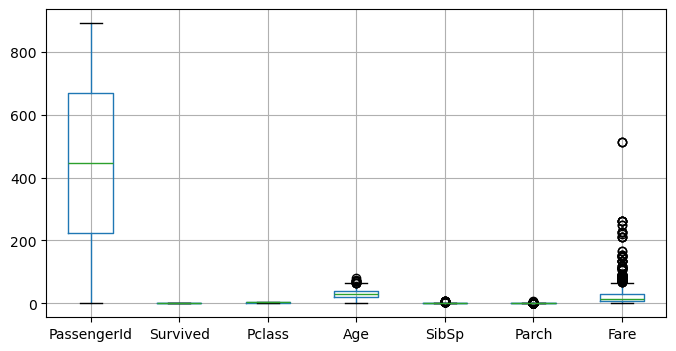

In [44]:
#Boxplot
df_train.boxplot(figsize=(8,4))
plt.show()

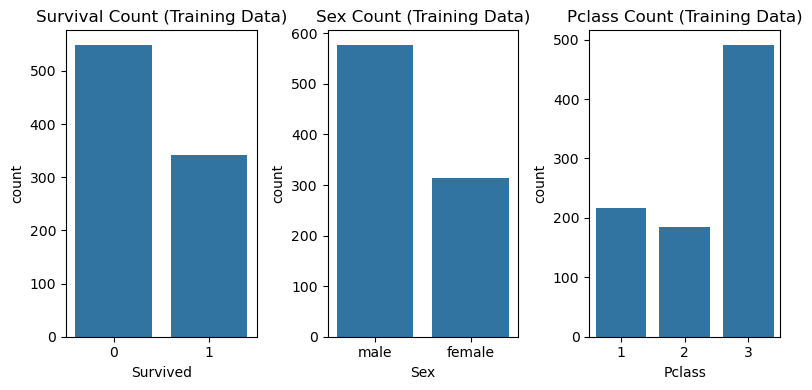

In [45]:
#Count plot for categorical column
fig, axes = plt.subplots(1, 3, figsize=(8, 4))
sns.countplot(x='Survived', data=df_train, ax=axes[0])
axes[0].set_title('Survival Count (Training Data)')
sns.countplot(x='Sex', data=df_train, ax=axes[1])
axes[1].set_title('Sex Count (Training Data)')
sns.countplot(x='Pclass', data=df_train, ax=axes[2])
axes[2].set_title('Pclass Count (Training Data)')
plt.tight_layout()
plt.show()

In [46]:
#Find correlation between numeric features
corr = num_cols.corr()
corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


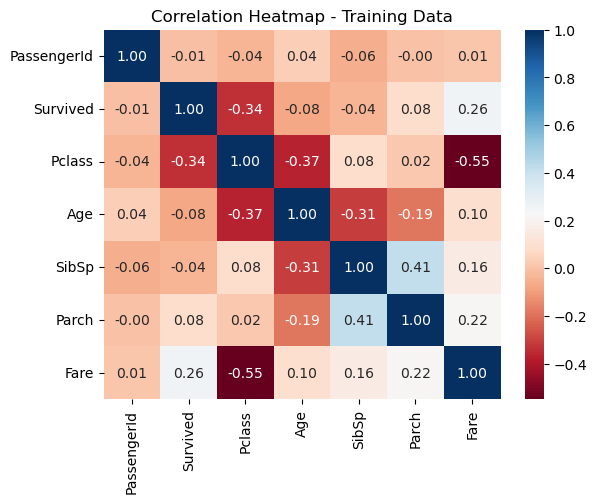

In [47]:
#Create heatmap
sns.heatmap(corr,annot=True,cmap='RdBu', fmt=".2f")
plt.title('Correlation Heatmap - Training Data')
plt.show()

### Analyze any patterns or correlations observed in the data

##### - Pclass has negative relation with Servived
##### - Fare has positive moderate relation


## 2. Data Preprocessing:

### a. Handle missing values (e.g., imputation).

In [48]:
#Check for missing values
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [49]:
#Fill miising values with it mean value for numeric column - age
df_train.fillna({'Age': df_train['Age'].mean()},inplace=True)
#Fill miising values with it mode value for categorical column - Embarked 
df_train.fillna({'Embarked': df_train['Embarked'].mode()[0]},inplace=True)
df_train


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [50]:
#Drop cabin column
df_train.drop(['Cabin','Name','PassengerId','Ticket'], axis=1,inplace=True)
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


In [51]:
#Check for missing values after imputation
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

### b. Encode categorical variables.

In [52]:
# Convert 'Sex' column to numerical (0 or 1)
df_train['Sex'] = df_train['Sex'].map({'male': 0, 'female': 1})
df_train = pd.get_dummies(df_train, columns=['Embarked'], drop_first=True)
df_train


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,0,22.000000,1,0,7.2500,False,True
1,1,1,1,38.000000,1,0,71.2833,False,False
2,1,3,1,26.000000,0,0,7.9250,False,True
3,1,1,1,35.000000,1,0,53.1000,False,True
4,0,3,0,35.000000,0,0,8.0500,False,True
...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13.0000,False,True
887,1,1,1,19.000000,0,0,30.0000,False,True
888,0,3,1,29.699118,1,2,23.4500,False,True
889,1,1,0,26.000000,0,0,30.0000,False,False


### 3. Model Building:

#### a. Build a logistic regression model using appropriate libraries (e.g., scikit-learn).

In [53]:
target=df_train['Survived']
features=df_train.drop(columns='Survived')

In [54]:
#import train_test_split and Logistic regression libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [55]:
#Create LogisticRegression model
model = LogisticRegression(max_iter=200) # Increased max_iter for convergence
model

LogisticRegression(max_iter=200)

#### b. Train the model using the training data.

In [56]:
#Split and train the logistic regression model
x_train, x_val, y_train, y_val = train_test_split(features, target, test_size=0.2, random_state=42)
model.fit(x_train, y_train)

LogisticRegression(max_iter=200)

### 4. Model Evaluation:

#### a. Evaluate the performance of the model on the testing data using accuracy, precision, recall, F1-score, and ROC-AUC score.

In [57]:
#import accuracy, precision, recall, F1-score, and ROC-AUC score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score,RocCurveDisplay

In [58]:
#Model evaluation
y_val_pred = model.predict(x_val)
y_pred_prob = model.predict_proba(x_val)[:, 1]

#Calculate performance metrics
Accuracy = accuracy_score(y_val, y_val_pred)
Precision = precision_score(y_val, y_val_pred)
Recall = recall_score(y_val, y_val_pred)
F1 = f1_score(y_val, y_val_pred)
ROC_AUC = roc_auc_score(y_val, y_pred_prob)

print("Evaluated Metrics Score:")
print(f"Accuracy: {Accuracy:.4f}")
print(f"Precision: {Precision:.4f}")
print(f"Recall: {Recall:.4f}")
print(f"F1-score: {F1:.4f}")
print(f"ROC-AUC Score: {ROC_AUC:.4f}")

Evaluated Metrics Score:
Accuracy: 0.8101
Precision: 0.7857
Recall: 0.7432
F1-score: 0.7639
ROC-AUC Score: 0.8819


#### Visualize the ROC curve.

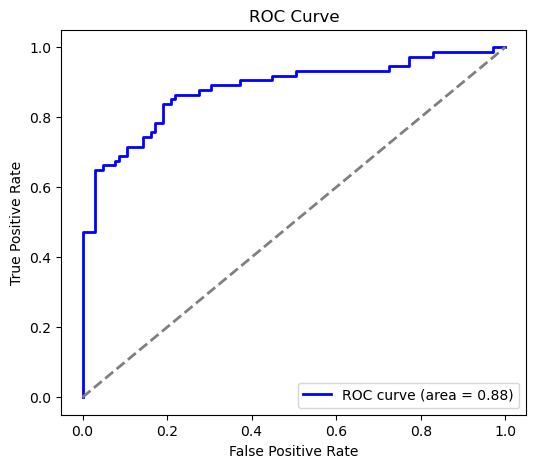

In [59]:
# Visualize the ROC curve.
fpr, tpr, thresholds = roc_curve(y_val, y_pred_prob)

# Plot the ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % ROC_AUC)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


### 5. Interpretation:

#### a. Interpret the coefficients of the logistic regression model.

In [60]:
# Get the coefficients
coefficients = model.coef_[0]

# Get feature names 
feature_names = x_train.columns

# Create a Series to associate coefficients with feature names
reg_coef = pd.Series(coefficients, index=feature_names)

# Print the coefficients and intercept
print("Model Coefficients:")
display(reg_coef)

Model Coefficients:


Pclass       -0.940877
Sex           2.590478
Age          -0.031346
SibSp        -0.296784
Parch        -0.111602
Fare          0.002550
Embarked_Q   -0.091987
Embarked_S   -0.404439
dtype: float64

#### b. Discuss the significance of features in predicting the target variable (survival probability in this case).

##### Discuss the significance of features in predicting the target variable
The coefficients from the logistic regression model indicate the relationship between each feature and the log-odds of survival. A positive coefficient means that as the feature's value increases, the log-odds of survival increase (higher probability of survival), while a negative coefficient indicates that as the feature's value increases, the log-odds of survival decrease (lower probability of survival).

Based on the coefficients:
Sex_male: This is the most significant predictor.female had the largest positive impact, showing that women were more likely to survive.
Pclass: This also has a strong negative impact. A higher Pclass value (e.g., 3rd class) is associated with a lower log-odds of survival, indicating that passengers in lower classes had a significantly reduced chance of survival.
Age:Age had a slight negative impact.
Embarked_Q and Embarked_S : Age had a slight negative impact — younger passengers generally survived more often.
SibSp: Having more siblings or spouses on board (SibSp) slightly decreases the log-odds of survival.
Fare: A small positive coefficient indicates that a higher fare is associated with a slightly higher log-odds of survival. 
Parch: The number of parents/children on board (Parch) has a very small negative impact on survival odds.

### 6. Deployment with Streamlit:

In [61]:
#import pickle file
import pickle

In [62]:
#declare the pickle file
file = 'log_reg.pkl'

In [63]:
#dump model to log_reg.pkl
pickle.dump(model,open(file,'wb'))

#### Deployment 
- Created the pickle file and write the model into the **'log_reg.pkl'**
- once we execute **"pickle.dump(model,open(file,'wb'))"** it will create **'log_reg.pkl'** file in working directory.
- Download the file and place it in anaconda prompt directory
- Create new ipynb named **'Model_Deployment.ipynb'** and read the pickle file and load the model for deployment.

## Interview Questions:

### 1. What is the difference between precision and recall?

#### difference between precision and recall

**Precision (Positive Predictive Value):**
- Formula: Precision=𝑇𝑃/𝑇𝑃+𝐹𝑃
- Focuses on the quality of positive predictions.
- Example: If your model predicts 100 emails as spam, and 90 are truly spam, precision = 90%.
- High precision means fewer false positives.

**Recall (Sensitivity or True Positive Rate):**
- Formula: Recall=𝑇𝑃/𝑇𝑃+𝐹𝑁
- Focuses on the coverage of actual positives.
- Example: If there are 100 spam emails in total, and your model correctly identifies 80, recall = 80%.
- High recall means fewer false negatives.

### 2. What is cross-validation, and why is it important in binary classification?

##### Definition: 
Cross-validation is a technique to evaluate how a model performs on unseen data by splitting the dataset into multiple subsets (folds). The model is trained on some folds and tested on the remaining fold, repeating the process multiple times

**Importance in Binary Classification:**

- Prevents Overfitting: Ensures the model isn’t just memorizing training data.

- Reliable Performance Estimate: Provides a more accurate measure of how the model will perform on new, unseen data.

- Handles Imbalanced Data: Stratified cross-validation ensures both classes are represented in each fold, which is crucial when one class is rare (e.g., fraud detection).

- Model Selection: Helps compare different algorithms or hyperparameters fairly